In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [164]:
data=pd.read_csv('data/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [165]:
data.size

2140

In [166]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [167]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [168]:
data.duplicated().sum()

1

In [169]:
data=data.drop_duplicates()

In [170]:
data.duplicated().sum()

0

In [171]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [172]:
X = data.drop('Type', axis=1)  
y = data['Type']  

In [173]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [259]:
from collections import Counter
print("Class distribution before balancing:", Counter(y_train))

Class distribution before balancing: Counter({1: 56, 2: 54, 7: 20, 3: 13, 5: 10, 6: 6})


In [269]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

print("Class distribution after oversampling:", Counter(y_train_oversampled))


Class distribution after oversampling: Counter({1: 56, 7: 56, 2: 56, 5: 56, 6: 56, 3: 56})


In [279]:
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB(),
    'SVM-SVC': SVC(kernel='linear', C=1),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy')
}
for name, model in algorithms.items():
    model.fit(X_train_oversampled,y_train_oversampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy * 100}%")
    
    # conf_matrix = confusion_matrix(y_test, y_pred)
    # print("\nConfusion Matrix:\n", conf_matrix)
    
    # report = classification_report(y_test, y_pred)
    # print("\nClassification Report:\n", report)

Accuracy of Logistic Regression: 72.22222222222221%
Accuracy of KNN: 74.07407407407408%
Accuracy of Naive Bayes: 46.2962962962963%
Accuracy of SVM-SVC: 64.81481481481481%
Accuracy of Decision Tree: 72.22222222222221%


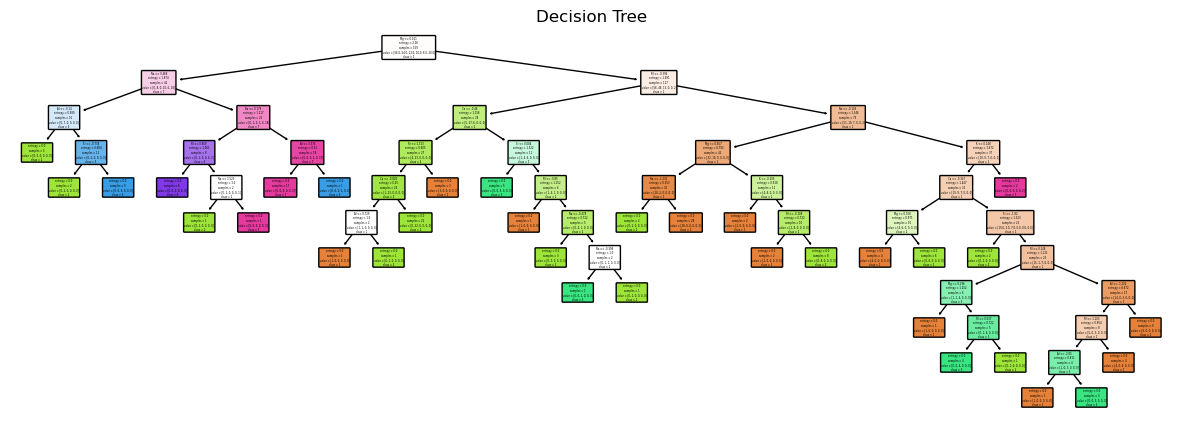

In [275]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(clf, 
          feature_names=X.columns,  
          class_names=[str(i) for i in y.unique()],
          filled=True, 
          rounded=True)
plt.title("Decision Tree")
plt.show()

In [281]:
#END